# Project: Computing the European Options Chain

## Background
The option chain is a chart that displays information regarding all available options contracts for specific underlying stocks or index funds. It shows various strike prices for both `call` and `put` option contracts, along with their respective prices and other important details, for a particular expiration date. In particular, the option chain starts with data for `call` contracts sorted in the order of ascending strike price, which is then followed by data for `put` contracts.

This project aims to calculate a crucial aspect of the options chain, which is the connection between the strike price and option premium for European `call` and `put` contracts.

### Reminder
* A `call` option is a financial contract that gives the holder the right, but not the obligation, to sell a specified asset, such as stocks, commodities, or currencies, at a predetermined price within a specified time period. Let's consider stock as the underlying asset, then a single standard `call` contract controls `100` shares of stock. 
* A `put` option is a financial contract that gives the holder the right, but not the obligation, to sell a specified asset, such as stocks, commodities, or currencies, at a predetermined price within a specified time period. Let's consider stock as the underlying asset, then a single standard `put` contract controls `100` shares of stock. 
* Buyers of [European](https://www.investopedia.com/terms/e/europeanoption.asp) style contracts can only exercise their right to purchase or sell the underlying shares of stock on the expiration date. 

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the project, and custom types to model the components of our exercises. See the `ChE 133 module 1` worked example for a description of the `Packages`, `Types`, and `Functions` loaded by `Include.jl`.

In [1]:
include("Include.jl");

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


## Learning objectives
In this project, you will:

* __Task 1__: Calculate the premium for [European](https://en.wikipedia.org/wiki/Option_style) `call` and `put` option contracts as a function of the strike price `K`, all other parameters held constant, using the [Black–Scholes pricing formula ](https://en.wikipedia.org/wiki/Black–Scholes_model).
* __Task 2__: Encode the pricing information in a `DataFrame` which mimics the fields in a standard options chain

## Project

The premium paid for a European style options contract is a function of many factors, such as the relative distance between strike price `K` and the current value of the share price $S(0)$. Let's consider contracts with the parameters: `DTE = 120` days, `IV = 0.25`, $S(0)$ = 60.0 USD/share.

In [2]:
Δt = (1.0/365.0);
Sₒ = 60.0;
T = 120.0*Δt;
r̄ = 0.05;
σ̄ = 0.25;

Create an instance of the `MyBlackScholesContractPricingModel` type which holds the risk-free rate $r$ and the initial share price $S_{\circ}$. Then pass this instance, a European `call` or `put` model, to the `premium(...)` function:

In [3]:
bsm_model = build(MyBlackScholesContractPricingModel, (
        Sₒ = Sₒ, r = r̄
));

### Task 1: Calculate the Options Chain Premiums
Calculate the premium for strike prices ranging from `K=20` to `K=100`, all other parameters held constant. Record the estimated premium for `call` and `put` contracts in the `df_simulation` DataFrame. 

For each strike price:
* First, use the `build(…)` method to create instances of the `MyEuropeanCallContractModel` and `MyEuropeanPutContractModel` types, which contains information about the contracts. Store these instances in the `call_contract_model` and `put_contract_model` variables. 
* Next, calculate the premium for each contract using the `premium(…)` function.
* Finally, store the strike price `K`, and the premium for the `call` and `put` contracts in the `df_simulation` DataFrame instance.

In [4]:
start_strike = 20.0;
stop_strike = 100.0;
strikes = range(start_strike, stop = stop_strike, step=1) |> collect;
df_simulation = DataFrame(K=Float64[], premium_call = Float64[], premium_put = Float64[])
for strike ∈ strikes
    
    call_contract_model = build(MyEuropeanCallContractModel, (
        K = strike, IV = σ̄, DTE = T, sense = 1));
    
    put_contract_model = build(MyEuropeanPutContractModel, (
        K = strike, IV = σ̄, DTE = T, sense = 1));
    
    P_call = premium(call_contract_model, bsm_model);
    P_put = premium(put_contract_model, bsm_model);
    
    results_tuple = (
        K = strike,
        premium_call = P_call, 
        premium_put = P_put
    );
    
    push!(df_simulation, results_tuple);
end

#### Visualize

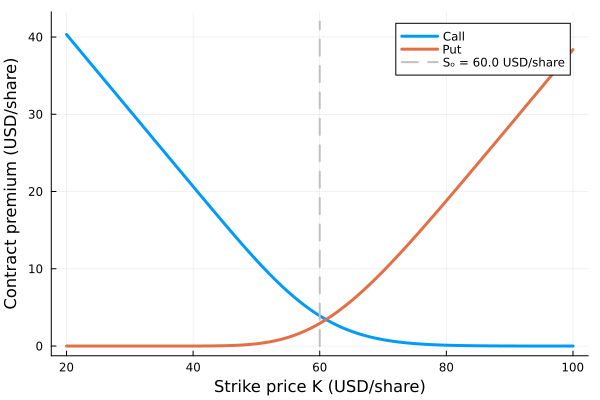

In [5]:
plot(df_simulation[:,1], df_simulation[:,2], label="Call", lw=3);
plot!(df_simulation[:,1], df_simulation[:,3], label="Put", lw=3)

vertical_line_y = range(0,step=0.1,stop=42) |> collect;
vertical_line_x = Sₒ*ones(length(vertical_line_y));
plot!(vertical_line_x,vertical_line_y, lw=2, c=:gray75, ls=:dash, label="Sₒ = $(Sₒ) USD/share")


xlabel!("Strike price K (USD/share)", fontsize=18)
ylabel!("Contract premium (USD/share)", fontsize=18)

### Task 2: Build the options chain `DataFrame`
The option chain starts with data for `call` contracts sorted in the order of ascending strike price, which is then followed by data for `put` contracts in the same order. Populate a `DataFrame` instance stored in the `options_chain_df` variable with the options chain data. The `options_chain_df` should have the following fields:

* `strike::Float64` holds the strike price for the contract
* `premium::Float64` holds the premimum value computed for this contract from `Task 1`
* `DTE::Int64` holds the days to expiration for the contracts, in this case `120 days`
* `Type:;String` holds the type of contract, either a `Call` or `Put`.

In [9]:
options_chain_df = DataFrame(strike=Float64[], premium = Float64[], DTE = Int64[], Type=String[])
for K ∈ strikes
    row_tuple = (
        strike = K, 
        premium = filter(:K => x -> (x == K), df_simulation)[1,:premium_call],
        DTE = 120,
        Type = "Call"
    )
    
    push!(options_chain_df, row_tuple)
end

for K ∈ strikes
       row_tuple = (
        strike = K, 
        premium = filter(:K => x -> (x == K), df_simulation)[1,:premium_put],
        DTE = 120,
        Type = "Put"
    )
    
    push!(options_chain_df, row_tuple)
end

In [10]:
options_chain_df

Row,strike,premium,DTE,Type
,Float64,Float64,Int64,String
1,20.0,40.33,120,Call
2,21.0,39.34,120,Call
3,22.0,38.36,120,Call
4,23.0,37.37,120,Call
5,24.0,36.39,120,Call
6,25.0,35.41,120,Call
7,26.0,34.42,120,Call
8,27.0,33.44,120,Call
9,28.0,32.46,120,Call
